# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **english**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 16th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

**FirstPart: Template Matching and Image Descriptors**

    4.1) Euclidean distance and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

**Second Part: Image matching**

    4.3) Recognition by correspondance, based on feature extraction (ORB)
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

**3.1** Detect the censure in the image `starbucks4.jpg`. Analyze and discuss the effect of different values of the parameters in censure function.

In [22]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2gray, rgba2rgb
from skimage import img_as_float
from skimage.feature import CENSURE, ORB, match_descriptors, plot_matches

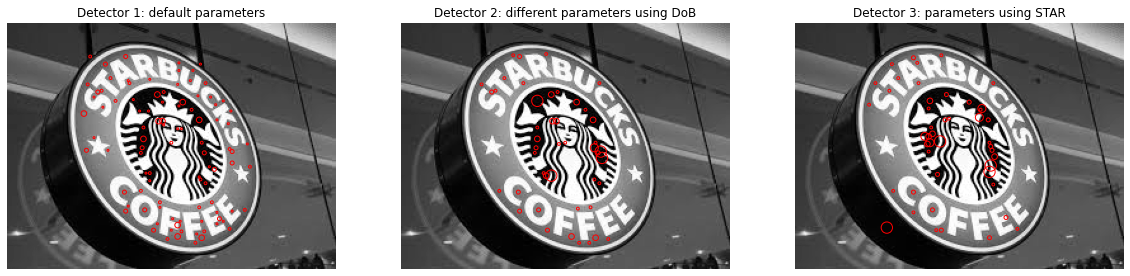

In [19]:
# Your solution here

#we read the image
starbucks4 = io.imread('images/starbucks4.jpg')
#change it to grayscale
starbucks4_gray = rgb2gray(starbucks4)

#we call on censure funtion, and try different parameters
detector = CENSURE()
detector.detect(starbucks4_gray)

#detector using parameters
detector2 = CENSURE(min_scale=2, max_scale=8, mode='DoB', non_max_threshold=0.20, line_threshold=15)
detector2.detect(starbucks4_gray)

#detector using parameters using STAR
detector3 = CENSURE(min_scale=2, max_scale=8, mode='STAR', non_max_threshold=0.20, line_threshold=15)
detector3.detect(starbucks4_gray)


#visualize
fig = plt.figure(figsize=(20,20))

fig.add_subplot(3,3,1)
plt.title('Detector 1: default parameters')
plt.imshow(starbucks4_gray, cmap='gray')
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
plt.axis('off')

fig.add_subplot(3,3,2)
plt.title('Detector 2: different parameters using DoB')
plt.imshow(starbucks4_gray, cmap='gray')
plt.scatter(detector2.keypoints[:, 1], detector2.keypoints[:, 0],
              2 ** detector2.scales, facecolors='none', edgecolors='r')
plt.axis('off')

fig.add_subplot(3,3,3)
plt.title('Detector 3: parameters using STAR')
plt.imshow(starbucks4_gray, cmap='gray')
plt.scatter(detector3.keypoints[:, 1], detector3.keypoints[:, 0],
              2 ** detector3.scales, facecolors='none', edgecolors='r')
plt.axis('off')
plt.show()

In [ ]:
"""
According to skimage.
Parameters:
min_scaleint: is optional, and it represents the minimum scale to extract keypoints from.

max_scaleint: also optional. Maximum scale to extract keypoints from. 
The keypoints will be extracted from all the scales except the first and the last.

mode{‘DoB’, ‘Octagon’, ‘STAR’}, optional
The three modes represent the shape of the bi-level filters. 
Use STAR and Octagon for better features and DoB for better performance.

non_max_threshold: float, optional
Threshold value used to suppress maximas and minimas with a weak magnitude response obtained after Non-Maximal Suppression.

line_thresholdfloat: optional
Threshold for rejecting interest points which have ratio of principal curvatures greater than this value.
"""

**3.2** Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


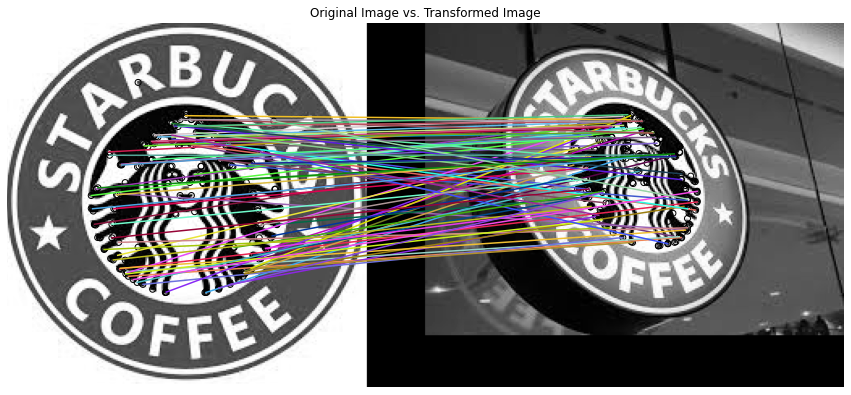

In [34]:
# Your solution here
#read the images
starbucks = io.imread('images/starbucks.jpg')
starbucks4 = io.imread('images/starbucks4.jpg')

#make it grayscale
starbucks_gray = rgb2gray(starbucks)
starbucks4_gray = rgb2gray(starbucks4)

#This code is similar to the one used in skimage for ORB
#we get the ORB descriptor
descriptor = ORB(n_keypoints=200)

#simila to what we did with CENSURE, we get the descriptor 1 and 2, so we can later compare them
#descriptor 1 using starbucks_gray
descriptor.detect_and_extract(starbucks_gray)
keypoints1 = descriptor.keypoints
descriptors1 = descriptor.descriptors

#descriptor 2 using starbucks4_gray
descriptor.detect_and_extract(starbucks4_gray)
keypoints2 = descriptor.keypoints
descriptors2 = descriptor.descriptors

# Array of the pixels which matches between both images
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=1.0)

#visualize, again using the code provided by skimage
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,15))
plt.gray()
plot_matches(ax, starbucks_gray, starbucks4_gray, keypoints1, keypoints2, matches12)
ax.set_title("Original Image vs. Transformed Image")
ax.axis('off')
plt.show()

Repeate the experiment comparing the `starbucks.jpg` image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

In [78]:
#we create a general ORB function that uses the template image and compares it to all images in the image collection
def matches(template, ic):
    # Array where the data will be stored
    output = []
    
    #This code is similar to the one used in skimage for ORB
    #we get the ORB descriptor
    descriptor = ORB(n_keypoints=200)

    #similar to what we did with CENSURE, we get the descriptor 1 and 2, so we can later compare them
    #descriptor 1 using starbucks_gray
    descriptor.detect_and_extract(starbucks_gray)
    keypoints1 = descriptor.keypoints
    descriptors1 = descriptor.descriptors

    #we get the descriptor 2 by iteratin over the image collection, so we can later make the comparison
    for i in ic:
        #we do the same as before for ORB
        #we make the image float
        img = img_as_float(rgb2gray(i))
        
        #descriptor 2 using image i
        descriptor.detect_and_extract(img)
        keypoints2 = descriptor.keypoints
        descriptors2 = descriptor.descriptors
        
        matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=1.0)
        
        #now we just save all of the data and append it to the outpu
        data = [template, img, keypoints1, keypoints2, matches12]
        output.append(data)
    
    return output

#we created a general function to simply visualize all matches
def visualize(all_matches):
    for i in all_matches:
        
        #Struct of plots
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
        
        #remeber that the list contains 1:
        #[template, img, keypoints1, keypoints2, matches12]
        
        # Plot the matches
        plot_matches(ax, i[0], i[1], i[2], i[3], i[4])
        
        ax.set_title("Original Image vs. Transformed Image %" + str(len(i[4])/2)) #we also print the percentage of the match
        ax.axis('off')
        plt.show()    

<ipython-input-78-d35c24a0d017>:20: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = img_as_float(rgb2gray(i))


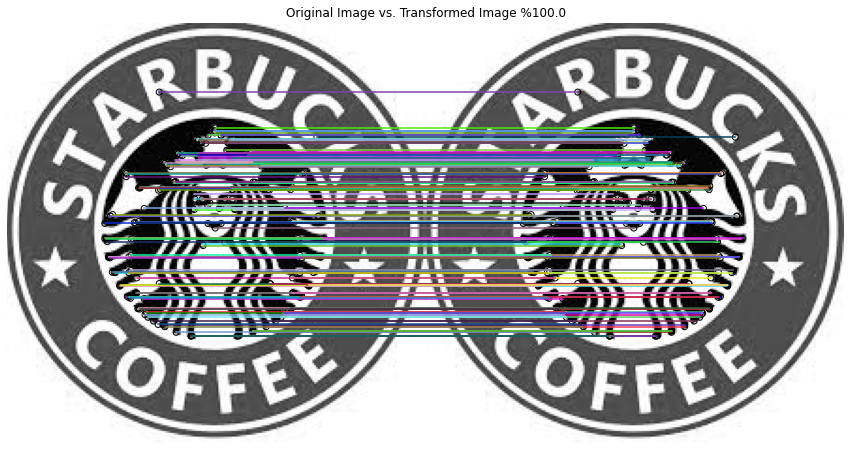

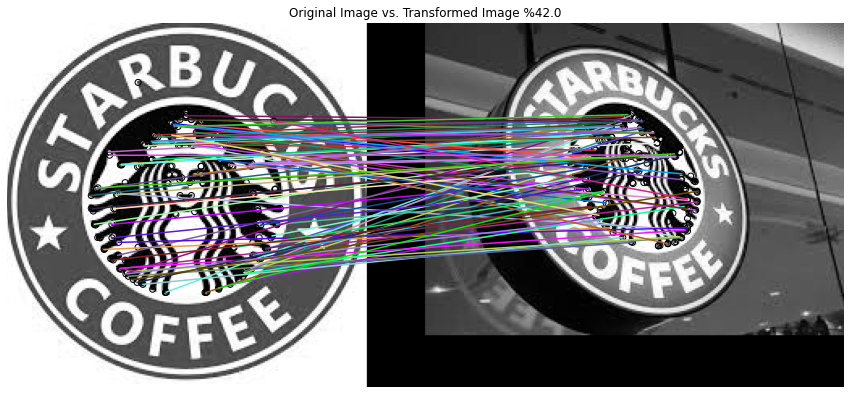

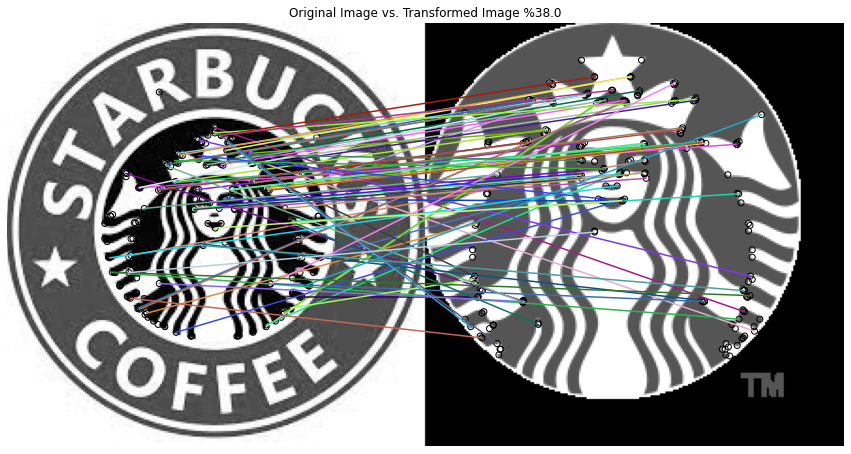

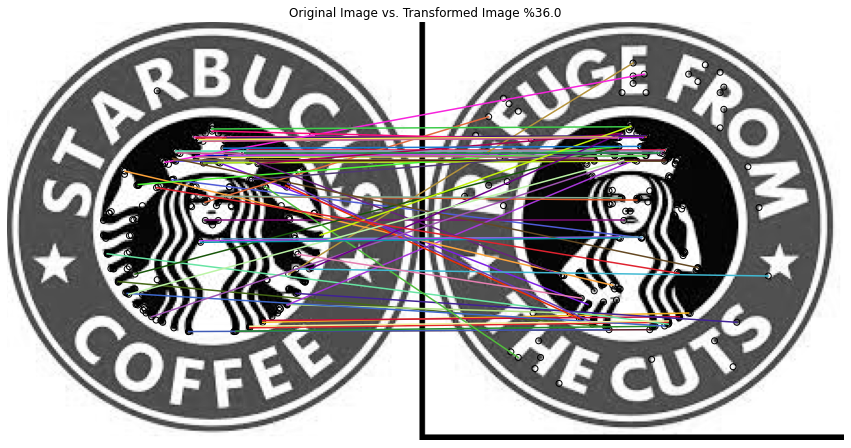

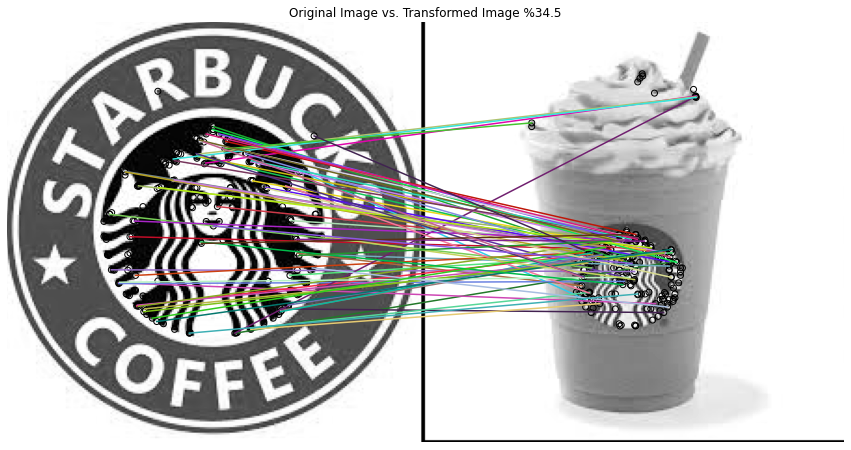

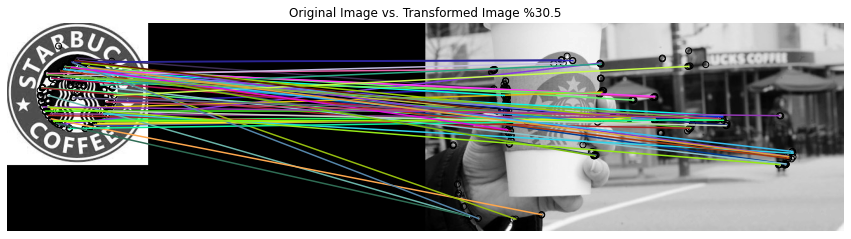

In [79]:
#I added all of the images into a folder, so I could use the ImageCollection function
ic = io.ImageCollection('images/StarbucksImages/*')

# Get the model image
starbucks = io.imread("images/starbucks.jpg")
starbucks_gray = rgb2gray(starbucks)

# Get matches with all the images
all_matches = matches(starbucks_gray, ic)

#x[4] because it is the len of the matches
#reverse = ture because it we want from better to worse,  bigger to smallest
all_matches.sort(key=lambda x:len(x[4]), reverse=True) #we sort the matches

#visualize
visualize(all_matches)

**3.3** Repeate the experiment: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

**Help:** To do so, you can use the function given below as example:

```
import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)
```

or

```
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)
```

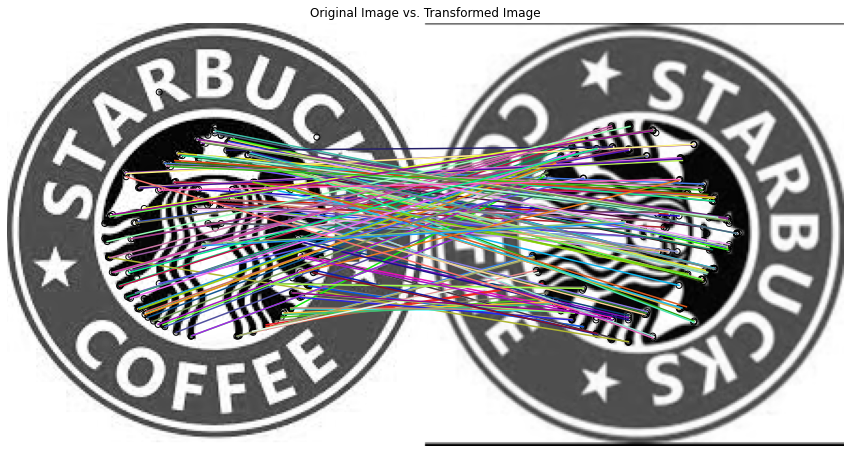

In [67]:
# Your solution here
from skimage.transform import rotate
#read the images
starbucks = io.imread('images/starbucks.jpg')

#make it grayscale
starbucks_gray = rgb2gray(starbucks)

starbucks_gray_rotated = rotate(starbucks_gray, 270)#rotate by 270 degress

#This code is similar to the one used in skimage for ORB
#we get the ORB descriptor
descriptor = ORB(n_keypoints=200)

#simila to what we did with CENSURE, we get the descriptor 1 and 2, so we can later compare them
#descriptor 1 using starbucks_gray
descriptor.detect_and_extract(starbucks_gray)
keypoints1 = descriptor.keypoints
descriptors1 = descriptor.descriptors

#descriptor 2 using starbucks_gray_rotated
descriptor.detect_and_extract(starbucks_gray_rotated)
keypoints2 = descriptor.keypoints
descriptors2 = descriptor.descriptors

# Array of the pixels which matches between both images
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=1.0)

#visualize, again using the code provided by skimage
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,15))
plt.gray()
plot_matches(ax, starbucks_gray, starbucks_gray_rotated, keypoints1, keypoints2, matches12)
ax.set_title("Original Image vs. Transformed Image")
ax.axis('off')
plt.show()

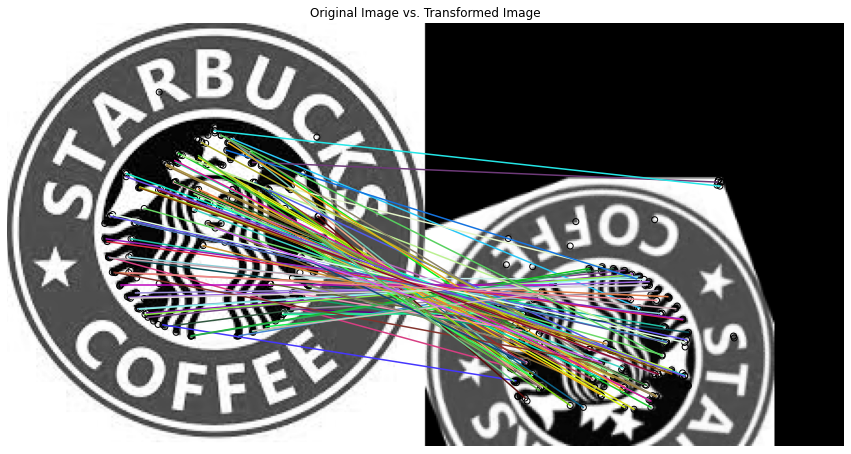

In [71]:
# Your solution here
#Now we change scale and orientation
from skimage.transform import rotate, AffineTransform, warp
#read the images
starbucks = io.imread('images/starbucks.jpg')

#make it grayscale
starbucks_gray = rgb2gray(starbucks)

starbucks_gray_rotated = rotate(starbucks_gray, 200)#rotate by 270 degress
tform = AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = warp(starbucks_gray_rotated, tform)

#This code is similar to the one used in skimage for ORB
#we get the ORB descriptor
descriptor = ORB(n_keypoints=200)

#simila to what we did with CENSURE, we get the descriptor 1 and 2, so we can later compare them
#descriptor 1 using starbucks_gray
descriptor.detect_and_extract(starbucks_gray)
keypoints1 = descriptor.keypoints
descriptors1 = descriptor.descriptors

#descriptor 2 using starbucks_gray_rotated
descriptor.detect_and_extract(img_transformed)
keypoints2 = descriptor.keypoints
descriptors2 = descriptor.descriptors

# Array of the pixels which matches between both images
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=1.0)

#visualize, again using the code provided by skimage
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,15))
plt.gray()
plot_matches(ax, starbucks_gray, img_transformed, keypoints1, keypoints2, matches12)
ax.set_title("Original Image vs. Transformed Image")
ax.axis('off')
plt.show()

**(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



<ipython-input-82-33a314c9ee7b>:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  cocacola_gray = rgb2gray(cocacola)
<ipython-input-78-d35c24a0d017>:20: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = img_as_float(rgb2gray(i))


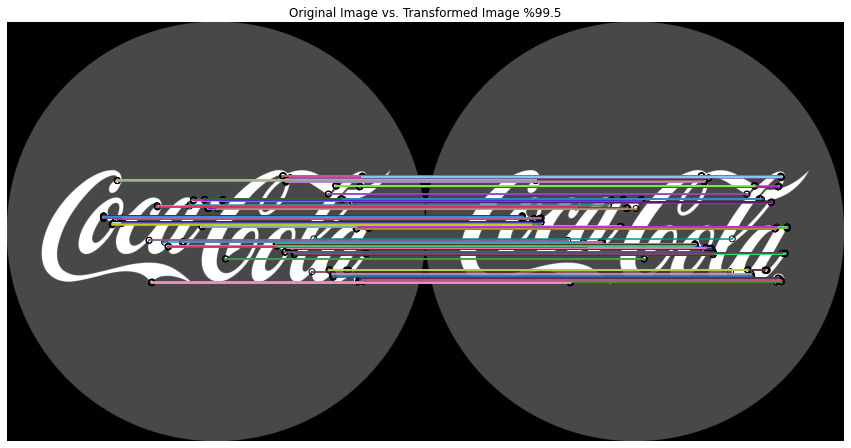

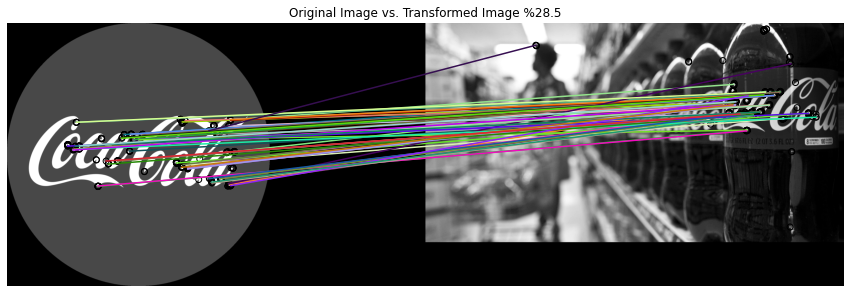

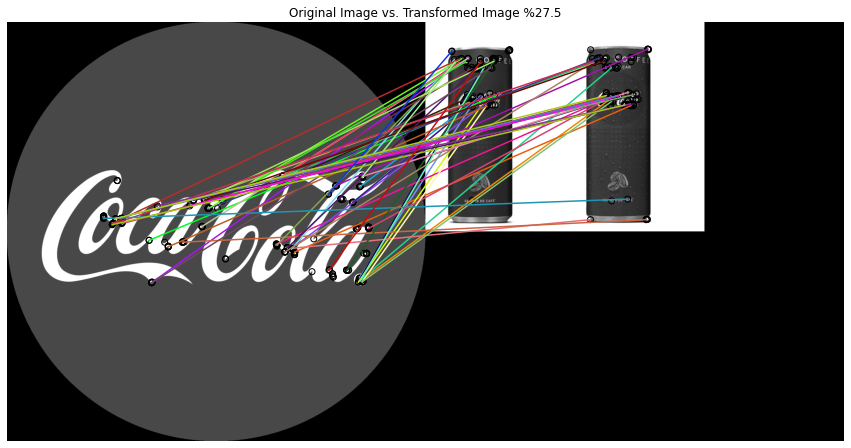

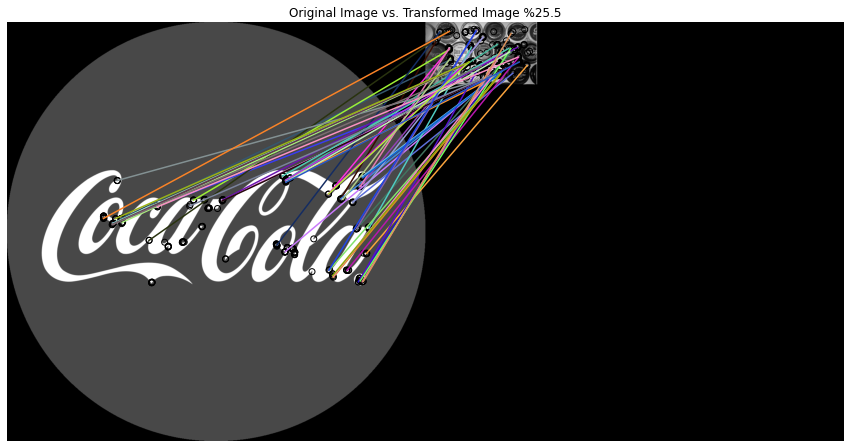

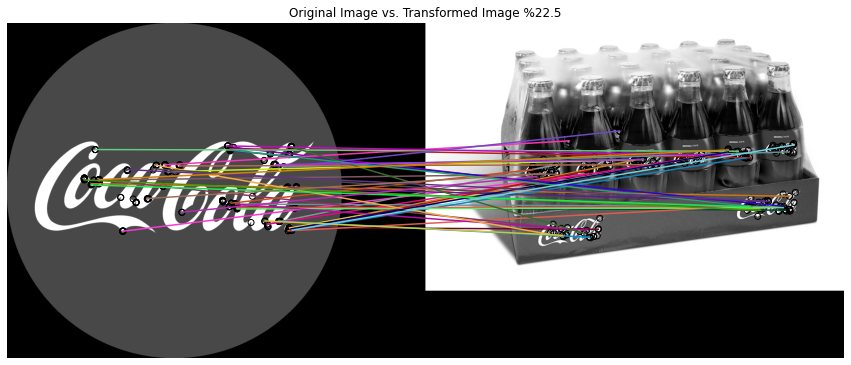

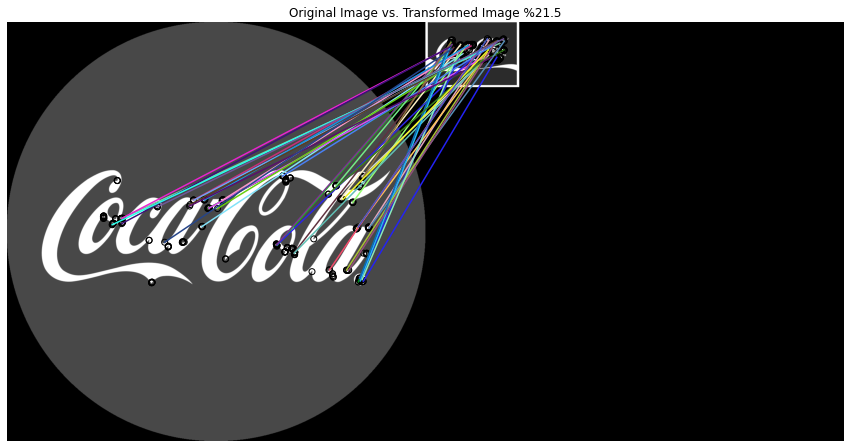

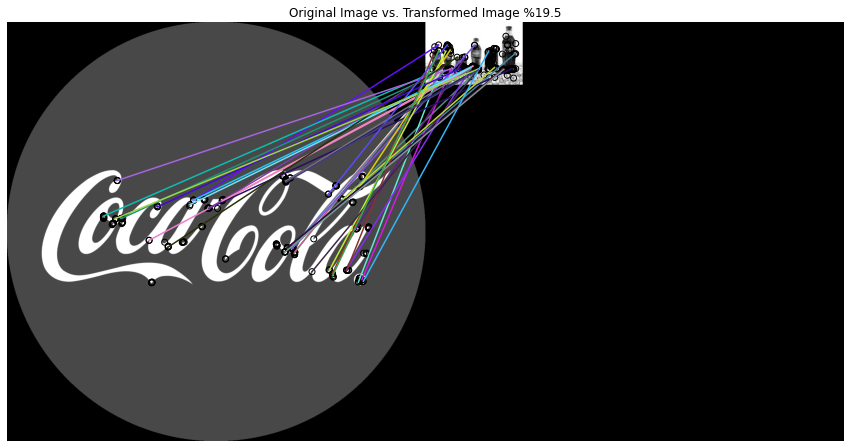

In [82]:
# Your solution here
ic = io.ImageCollection('images/CocaColaImages/*')

# Get the model image
cocacola = io.imread("images/CocaColaImages/cocacola_logo.png")
cocacola_gray = rgb2gray(cocacola)

# Get matches with all the images
all_matches = matches(cocacola_gray, ic)

#x[4] because it is the len of the matches
#reverse = ture because it we want from better to worse,  bigger to smallest
all_matches.sort(key=lambda x:len(x[4]), reverse=True) #we sort the matches

#visualize
visualize(all_matches)

<ipython-input-83-a7939b51e8f6>:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  cocacola_gray = rgb2gray(cocacola)


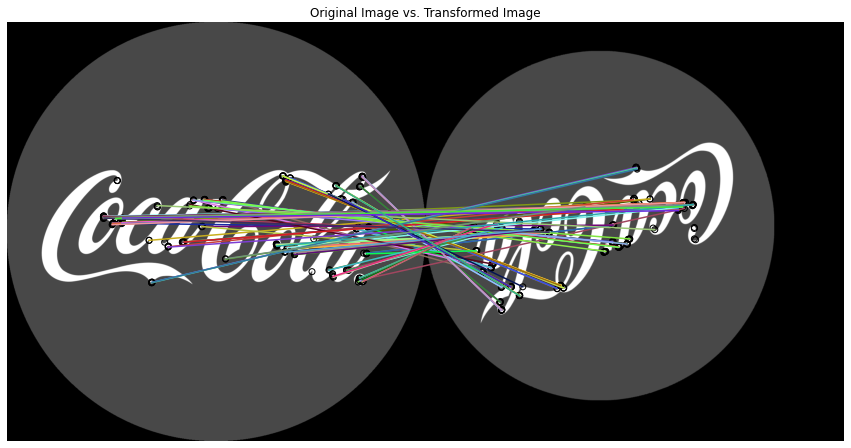

In [83]:
#Now we change scale and orientation
from skimage.transform import rotate, AffineTransform, warp
#read the images
cocacola = io.imread("images/CocaColaImages/cocacola_logo.png")

#make it grayscale
cocacola_gray = rgb2gray(cocacola)

cocacola_gray_rotated = rotate(cocacola_gray, 200)#rotate by 270 degress
tform = AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = warp(cocacola_gray_rotated, tform)

#This code is similar to the one used in skimage for ORB
#we get the ORB descriptor
descriptor = ORB(n_keypoints=200)

#simila to what we did with CENSURE, we get the descriptor 1 and 2, so we can later compare them
#descriptor 1 using starbucks_gray
descriptor.detect_and_extract(cocacola_gray)
keypoints1 = descriptor.keypoints
descriptors1 = descriptor.descriptors

#descriptor 2 using starbucks_gray_rotated
descriptor.detect_and_extract(img_transformed)
keypoints2 = descriptor.keypoints
descriptors2 = descriptor.descriptors

# Array of the pixels which matches between both images
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=1.0)

#visualize, again using the code provided by skimage
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,15))
plt.gray()
plot_matches(ax, cocacola_gray, img_transformed, keypoints1, keypoints2, matches12)
ax.set_title("Original Image vs. Transformed Image")
ax.axis('off')
plt.show()

**3.4** Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

In [ ]:
# Your solution here
"""
What are the advantages of the ORB object detection with respect to the HOG and template object detector?
We can see that one advantage is the fact that ORB object detection is less sensitive to rotations; therefore, it works
better when tasked with finding objects in images.

What would happen if you analyse an image that does not contain the Starbucks logo?
The same thing we see with the image with worst matches(the cup in the street), it will try to find matches and give false
similarity points

Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it)
We could use SIFT algorithm since it takes corners as points of interest, and as far as I understand, SIFT is usually better
than ORB when it comes to changes in orientation and scale, althought this only works with 2D images, if the image were to
be 3D, like a statue, and we were to change the point of view, it wouldn't work after a certain angle.
"""

### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)